In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [102]:
# import some data to play with
fraud = pd.read_csv('Fraud_check.csv')

In [103]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [104]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [105]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [106]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [107]:
fraud['status'] = fraud['Taxable.Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')

In [108]:
fraud.drop(['Taxable.Income'], axis=1, inplace=True)

In [109]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,status
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [110]:
fraud.Undergrad.replace(("YES","NO"),(1,0),inplace = True)
fraud.Urban.replace(("YES","NO"),(1,0),inplace = True)
fraud.status.replace(("Risky","Good"),(1,0),inplace = True)

In [111]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,status
0,0,Single,50047,10,1,0
1,1,Divorced,134075,18,1,0
2,0,Married,160205,30,1,0
3,1,Single,193264,15,1,0
4,0,Married,27533,28,0,0


In [112]:
# creating dummies for object data
fraud = pd.get_dummies(fraud)
fraud.head()

,Undergrad,City.Population,Work.Experience,Urban,status,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,50047,10,1,0,0,0,1
1,1,134075,18,1,0,1,0,0
2,0,160205,30,1,0,0,1,0
3,1,193264,15,1,0,0,0,1
4,0,27533,28,0,0,0,1,0


In [148]:
#dividing the datasets into X and Y variables
x = fraud.loc[:,fraud.columns!='status']
y = fraud['status']

In [149]:
x

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,50047,10,1,0,0,1
1,1,134075,18,1,1,0,0
2,0,160205,30,1,0,1,0
3,1,193264,15,1,0,0,1
4,0,27533,28,0,0,1,0
...,...,...,...,...,...,...,...
595,1,39492,7,1,1,0,0
596,1,55369,2,1,1,0,0
597,0,154058,0,1,1,0,0
598,1,180083,17,0,0,1,0


In [150]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int64

In [151]:
fraud['status'].value_counts()

0    476
1    124
Name: status, dtype: int64

In [152]:
fraud['status'].unique()

array([0, 1], dtype=int64)

In [153]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'City.Population',
 'Work.Experience',
 'Urban',
 'status',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single']

In [154]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [155]:
x_train

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
332,1,84132,1,0,1,0,0
13,0,86649,16,1,0,1,0
274,1,112584,25,0,0,1,0
257,1,31611,17,1,0,1,0
112,1,193038,26,1,0,0,1
...,...,...,...,...,...,...,...
440,0,170407,13,1,0,0,1
165,1,38463,23,1,0,1,0
7,1,131253,3,1,0,0,1
219,1,26814,9,0,1,0,0


In [156]:
y_train

332    0
13     0
274    0
257    0
112    0
      ..
440    0
165    0
7      0
219    1
326    1
Name: status, Length: 480, dtype: int64

In [166]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

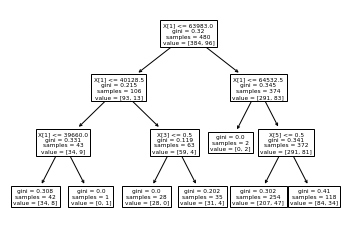

In [167]:
#PLot the decision tree
tree.plot_tree(model);

C:\Users\ayush\anaconda3\lib\site-packages\sklearn\tree\_export.py:677: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


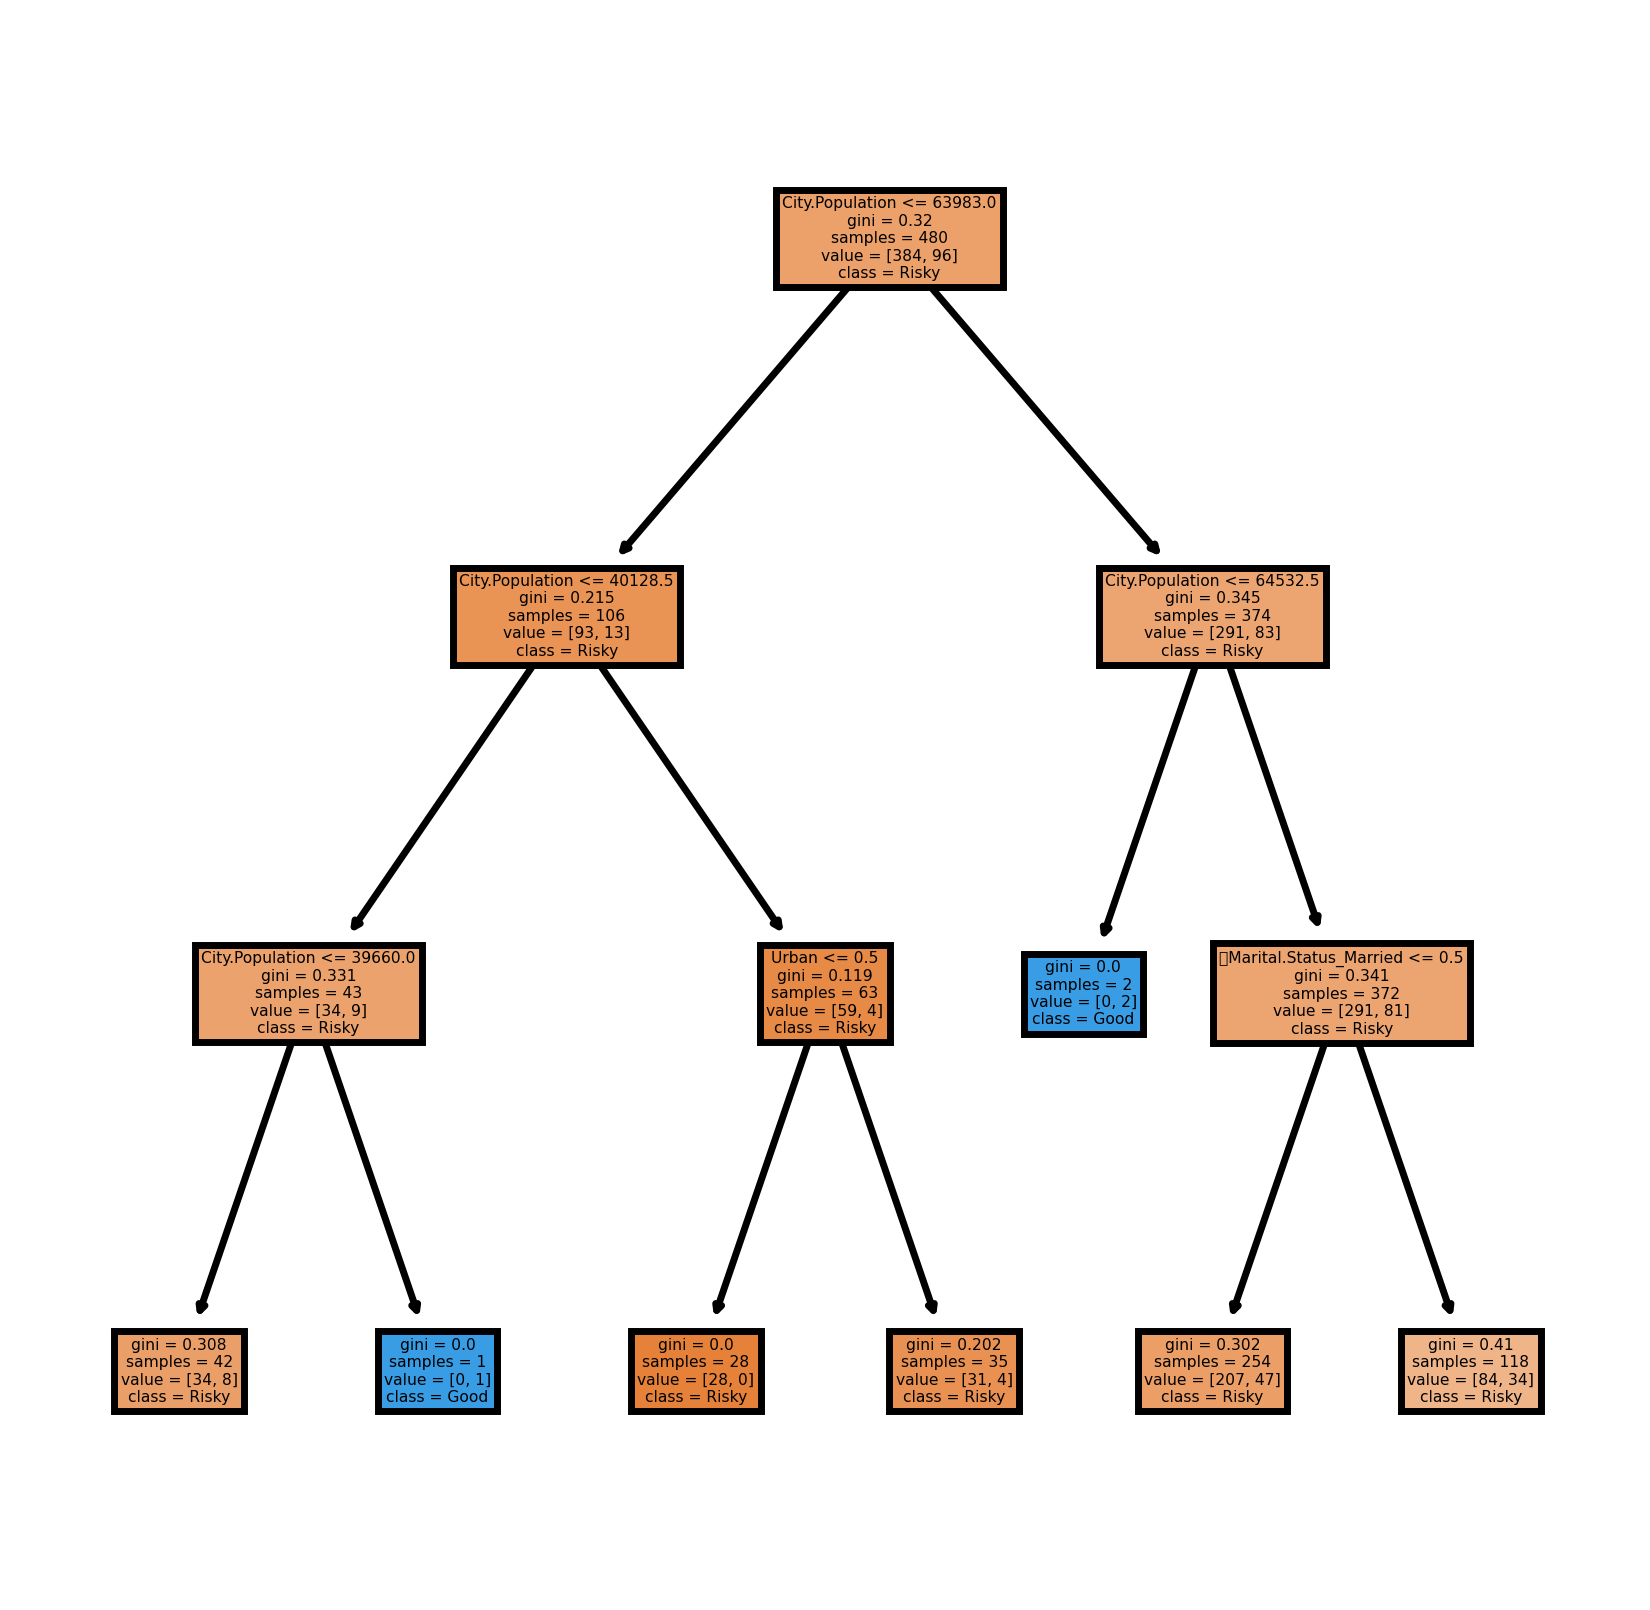

In [168]:
fn=['Undergrad','City.Population','Work.Experience','Urban',"Marital.Status_Divorced","	Marital.Status_Married","Marital.Status_Single"]
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names = cn,
               filled = True);

In [173]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    119
1      1
dtype: int64

In [174]:
y_test

159    0
307    0
253    0
528    0
137    1
      ..
102    0
577    0
18     0
560    0
62     0
Name: status, Length: 120, dtype: int64

In [175]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [172]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
status,,
0,91,1
1,28,0


In [176]:
# Accuracy 
np.mean(preds==y_test)

0.7583333333333333

In [177]:
y_test[127:]

Series([], Name: status, dtype: int64)